In [1]:
import numpy as np 
import cv2
import math
from ipywidgets import interact, IntSlider , Select
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
 
x1 = IntSlider(value=1, min=1, max=20, step=1, description='x:',)
y1 = IntSlider(value=1, min=1, max=20, step=1, description='y:',)
files = ['../src/assets/shaun.jpg']
selected = Select(description='画像', options=files, rows=5,)
 
def show_plot(col1, col2 , col3):
    img = cv2.imread(col3)
    (h, w, c) = img.shape
    flex_x = np.zeros((h,w),np.float32)
    flex_y = np.zeros((h,w),np.float32)
    dst = cv2.remap(img,flex_x,flex_y,cv2.INTER_LINEAR)
    for y in range(int(h/2)):
        for x in range(int(w/2)):
            flex_x[y,x] = x + math.sin(x/30) * col1
            flex_y[y,x] = y + math.cos(y/30) * col2
    #h/2* w/2 size
    dst = cv2.remap(img,flex_x,flex_y,cv2.INTER_LINEAR)
    dst = cv2.cvtColor(dst , cv2.COLOR_BGR2RGB)
    plt.imshow(dst)
    type(dst)
    new_img = cv2.imread(col3)
    new_img = cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB)
    for y in range(int(h/2)):
        for x in range(int(w/2)):
            new_img[y,x] = dst[y,x]
    plt.figure(figsize=(10,10))
    plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
    plt.imshow(new_img)
    plt.show()
 
interact(show_plot, col1=x1, col2=y1 , col3 = selected)

interactive(children=(IntSlider(value=1, description='x:', max=20, min=1), IntSlider(value=1, description='y:'…

<function __main__.show_plot(col1, col2, col3)>

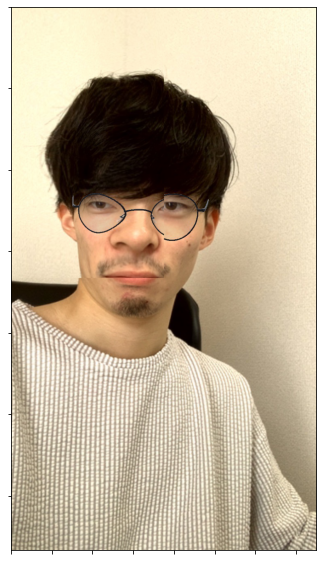

In [10]:
#0~20
x_volume = 10
y_volume = 10

file = '../src/assets/shaun.jpg'
path='../src/assets/'
img = cv2.imread(file)
(h, w, c) = img.shape
flex_x = np.zeros((h,w),np.float32)
flex_y = np.zeros((h,w),np.float32)
dst = cv2.remap(img,flex_x,flex_y,cv2.INTER_LINEAR)
for y in range(int(h/2)):
    for x in range(int(w/2)):
        flex_x[y,x] = x + math.sin(x/30) * x_volume
        flex_y[y,x] = y + math.cos(y/30) * y_volume
#h/2* w/2 size
dst = cv2.remap(img,flex_x,flex_y,cv2.INTER_LINEAR)
dst = cv2.cvtColor(dst , cv2.COLOR_BGR2RGB)
new_img = cv2.imread(file)
new_img = cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB)
for y in range(int(h/2)):
    for x in range(int(w/2)):
        new_img[y,x] = dst[y,x]
plt.figure(figsize=(10,10))
plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
plt.imshow(new_img)
plt.show()


In [4]:
import skimage.transform  
from PIL import Image  
import numpy as np  

def distort(file_path, roi_points, from_points, to_points):  
    im = Image.open(file_path).convert('RGBA')  
    from_points = np.concatenate((roi_points, from_points))  
    to_points = np.concatenate((roi_points, to_points))  
    affin = skimage.transform.PiecewiseAffineTransform()  
    affin.estimate(to_points, from_points)  
    im_array = skimage.transform.warp(im, affin)  
    im_array = np.array(im_array * 255., dtype=np.uint8)  
    if im_array.shape[2] == 1:  
        im_array = im_array.reshape((im_array.shape[0],im_array.shape[1]))  
    warped_im = Image.fromarray(im_array, 'RGBA')  
    im.paste(warped_im, (0, 0), warped_im)  
    return im  


In [12]:

file_path = '../src/assets/shaun.jpg'  
roi_points = [(100,100),(400,100),(400,400),(100,400)]  
from_points = [(300,300),(250,250)]  
to_points = [(350,350),(200,200)]  
#im = distort(file_path, roi_points, from_points, to_points)  
im = Image.open(file_path).convert('RGBA')  
from_points = np.concatenate((roi_points, from_points))  
to_points = np.concatenate((roi_points, to_points))  
affin = skimage.transform.PiecewiseAffineTransform()  
affin.estimate(to_points, from_points)  
print(type(affin))
im_array = skimage.transform.warp(im, affin)  
im_array = np.array(im_array * 255., dtype=np.uint8)  
if im_array.shape[2] == 1:  
    im_array = im_array.reshape((im_array.shape[0],im_array.shape[1]))  
warped_im = Image.fromarray(im_array, 'RGBA')  
im.paste(warped_im, (0, 0), warped_im)  

im.show()


<class 'skimage.transform._geometric.PiecewiseAffineTransform'>
